In [39]:
import networkx as nx
import numpy as np

In [40]:
G=nx.erdos_renyi_graph(10,0.4)
DG=nx.DiGraph(G)
base=9
A=nx.laplacian_matrix(G)
Bmatrix=np.mat(np.random.rand(9,9))
for i in range(9):
    for j in range(9):
        Bmatrix[i,j]=A[i,j]
        
inverseB=np.linalg.inv(Bmatrix)   

In [41]:
Cmatrix=np.mat(np.random.rand(9,9))
for i in range(9):
    for j in range(9):
        Cmatrix[i,j]=inverseB[i,j]**2
        

In [42]:
for i in DG.nodes():
    DG.node[i]['resource']=np.random.rand()
    
for i,j in DG.edges():
    DG.edge[i][j]['conductance']=np.random.rand()
    DG.edge[i][j]['potential']=np.random.rand()  
    
neiborbase=DG.neighbors(base)
for i in neiborbase:
    DG.edge[base][i]['conductance']=1
    DG.edge[base][i]['potential']=0     

In [43]:
def updateDG(DG):
    for j,i in DG.edges():
        neibornode=[k for k in DG.neighbors(j) if k !=i]
        A=[DG.edge[k][j]['conductance'] for k in neibornode]
        B=[DG.edge[k][j]['potential'] for k in neibornode ]
        
        if j==base:
            DG.edge[j][i]['conductance']=1
            DG.edge[j][i]['potential']=0
        else:
            DG.edge[j][i]['conductance']=sum(A)/(sum(A)+1)
            DG.edge[j][i]['potential']=(sum(B)+DG.node[j]['resource'])/(sum(A)+1)
            
            
    for i in DG.nodes():
        neibornode=[j for j in DG.neighbors(i) ]
        A=[DG.edge[j][i]['conductance'] for j in neibornode]
        B=[DG.edge[j][i]['potential'] for j in neibornode ]
        DG.node[i]['potential']=(sum(B)+DG.node[i]['resource'])/sum(A)
    
    
            
    return DG           
            
        


In [44]:
def getpotential(DG):
    potentail=[] 
    for i in range(9):
        potentail.append(DG.node[i]['potential'])
    potentail=np.mat(potentail)
    potentail=potentail.reshape(9,1)
    
    return potentail          
    
    

In [45]:
def getresource(DG):
    resourcelist=[]
    for i in range(9):
        resourcelist.append(DG.node[i]['resource'])
        
    resourcelist=np.mat(resourcelist)
    resourcelist=resourcelist.reshape(9,1)
    return resourcelist               

In [46]:
def getbppotential(DG):
    bppotentail=[] 
    for i in range(9):
        bppotentail.append(DG.node[i]['bpdeltapotential'])
    bppotentail=np.mat(bppotentail)
    bppotentail=bppotentail.reshape(9,1)
    
    return bppotentail             
    
    

In [47]:
for i in range(500):
    DG=updateDG(DG)      

In [48]:
DGpotentaillist=getpotential(DG)
DGresourcelist=getresource(DG)  

In [49]:
allstand=[]
alllaplace=[]
allbp=[]

In [50]:

for i in range(100):
    fDG=DG.copy()
    for i in fDG.nodes():
        fDG.node[i]['resource']=DG.node[i]['resource']+0.1*np.random.normal(0,1)
    for i in range(500):
        fDG=updateDG(fDG)
        
    for i,j in fDG.edges():
        fDG.edge[i][j]['delta']=fDG.edge[i][j]['potential']-DG.edge[i][j]['potential']
        
    for i in fDG.nodes():
        neibornode=[j for j in fDG.neighbors(i) ]
        A=[fDG.edge[j][i]['conductance'] for j in neibornode]
        B=[fDG.edge[j][i]['delta']**2 for j in neibornode]
        fDG.node[i]['bpdeltapotential']=(sum(B)+(fDG.node[i]['resource']-DG.node[i]['resource'])**2)/(sum(A))**2
   
    fDGpotentaillist=getpotential(fDG)
    fDGresourcelist=getresource(fDG)
    fDGGbppotentiallist=getbppotential(fDG)
    deltapotential=fDGpotentaillist-DGpotentaillist
    stand=np.multiply(deltapotential,deltapotential)
    deltaresource=fDGresourcelist-DGresourcelist
    A=np.multiply(deltaresource,deltaresource)
    laplace=Cmatrix*A
    
    allstand.append(stand)
    alllaplace.append(laplace)
    allbp.append(fDGGbppotentiallist)    
    

In [57]:
A=sum(allstand)/100

In [58]:
B=sum(allbp)/100

In [59]:
C=sum(alllaplace)/100

In [60]:
C

matrix([[ 0.01048203],
        [ 0.00852397],
        [ 0.00409864],
        [ 0.00369001],
        [ 0.00511357],
        [ 0.00798292],
        [ 0.00906083],
        [ 0.00410886],
        [ 0.00511726]])

In [61]:
B

matrix([[ 0.00447086],
        [ 0.0030717 ],
        [ 0.00393769],
        [ 0.0014239 ],
        [ 0.00193603],
        [ 0.00402353],
        [ 0.00344198],
        [ 0.00200966],
        [ 0.00246309]])

In [62]:
A

matrix([[ 0.01055919],
        [ 0.00838269],
        [ 0.00350954],
        [ 0.00368324],
        [ 0.0052195 ],
        [ 0.0080726 ],
        [ 0.00880583],
        [ 0.00420809],
        [ 0.00539329]])

In [63]:
xray=np.linspace(0,8,9)
Barray=[B[i,0] for i in range(9)] 
Aarray=[A[i,0] for i in range(9)] 
Carray=[C[i,0] for i in range(9)] 

In [64]:
import matplotlib.pyplot as plt

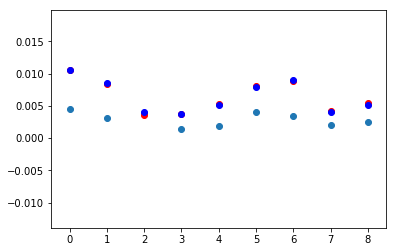

In [65]:
plt.scatter(xray,Barray)
plt.scatter(xray,Aarray,c='r')
plt.scatter(xray,Carray,c='b')
plt.show()